# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

Ao analisar as colunas não identifiquei variáveis que deveriam ser numericas e estavam como obejtos e nem casos onde números inteiros eram 'float'.  
Contudo, verifiquei a existenências de colunas que deveriam ser 'str' e estavam como 'object'.


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [32]:
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

Anallaisando as informações temos que as colunas que possuem valkores nulos são: Genero, PhoneService, Pagamento_Mensal e Churn.

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [33]:
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


In [34]:
# A coluna Genero possui 0,48% de dados nulos, como essa é uma quantidade pequena em comparação ao todo.
# Tratativa escolhida foi a exclusão das linhas.
df.dropna(subset=['Genero'], inplace=True)

In [35]:
df['Genero'].isnull().sum()

np.int64(0)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

### Tratando a coluna 'Pagamento_Mensal'

In [36]:
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [37]:
df['Pagamento_Mensal'].median()

71.45

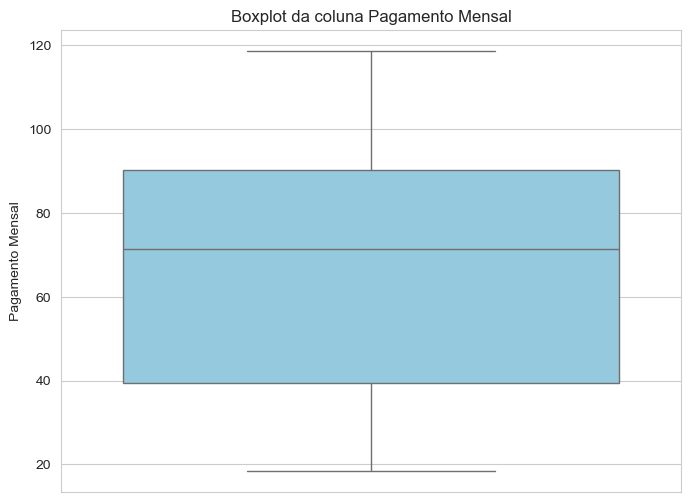

In [38]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Pagamento_Mensal', color = 'skyblue')
plt.title('Boxplot da coluna Pagamento Mensal')
plt.ylabel('Pagamento Mensal')
plt.show()


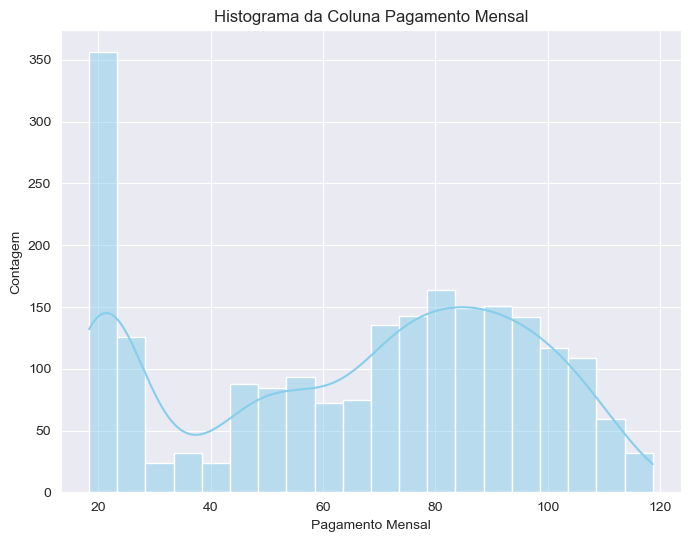

In [39]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Contagem')
plt.show()

In [40]:
#No boxplot podemos observar a ausência de outliers e distribuição maior na parte inferior da caixa. 
#No histograma vemos um pico no início seguido de uma melhor distribuição dos pagamentos.
mediana_pagamento_mensal = df['Pagamento_Mensal'].median()
df.fillna({'Pagamento_Mensal':mediana_pagamento_mensal}, inplace=True)

In [41]:
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

### Tratando a coluna 'PhoneService'

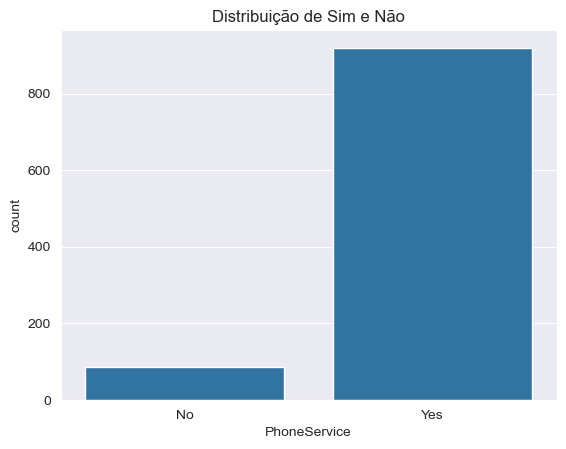

In [42]:
sns.countplot(x='PhoneService', data=df)
plt.title('Distribuição de Sim e Não')
plt.show()

In [43]:
df[df['PhoneService'] == 'No']

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
20,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
27,8665-UTDHZ,M,0,Yes,Yes,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,30.20,Yes
62,0526-SXDJP,Male,0,Yes,No,72,No,DSL,Yes,No,No,Two year,Bank transfer (automatic),71.45,2962.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,8263-JQAIK,Male,1,No,No,2,No,DSL,No,No,No,Month-to-month,Mailed check,24.45,47.50,Yes
2433,8314-DPQHL,Male,0,No,No,9,No,DSL,Yes,Yes,No,One year,Mailed check,50.80,463.60,No
2465,1740-CSDJP,Male,0,No,No,1,No,DSL,No,No,No,Month-to-month,Bank transfer (automatic),35.25,35.25,Yes
2468,2636-OHFMN,Male,0,Yes,No,4,No,DSL,No,No,Yes,Month-to-month,Electronic check,48.55,201.00,Yes


Havia quase 60% de dados nulos na coluna 'PhoneService', ao exportar o gráfico de barras notas que a maioria dos dados presentes era 'Yes'. 
Contudo, preencher todos os demais dados nulos com essa informação poderia ser uma afirmação falsa e erronea, enviesando nossos dados.  
Por esse motivo, optou-se pela remoção dessa coluna.

In [44]:
df.drop(columns={'PhoneService'}, inplace=True)

In [45]:
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,8191-XWSZG,F,0,No,No,52,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No


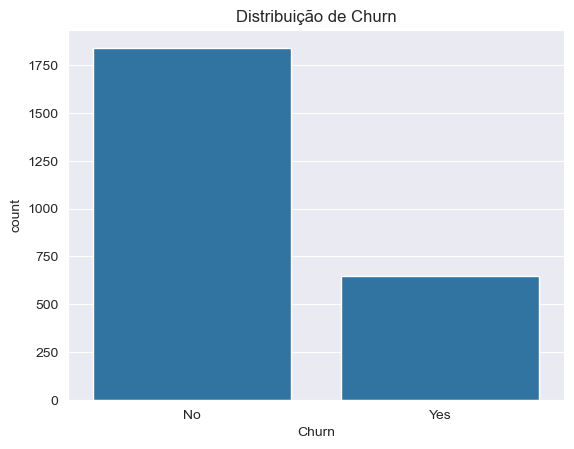

In [46]:
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

In [47]:
df['Churn'].isnull().sum()

np.int64(0)

Acima pudemos verificar a ausência de dados nulos nessa coluna. 

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [48]:
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [49]:
df['Genero'] = df['Genero'].str.upper()
df['Genero'].unique()

array(['FEMALE', 'MALE', 'F', 'M'], dtype=object)

In [50]:
df['Genero'] = df['Genero'].replace('F', 'FEMALE')
df['Genero'] = df['Genero'].replace('M', 'MALE')
df['Genero'].unique()

array(['FEMALE', 'MALE'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [51]:
df.rename(columns={'Dependents' : 'Dependentes','PaymentMethod' : 'Metodo_Pagamento'}, inplace=True)

In [52]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,FEMALE,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,MALE,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,MALE,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,MALE,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,8191-XWSZG,FEMALE,0,No,No,52,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No
17,9959-WOFKT,MALE,0,No,Yes,71,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,No
18,4190-MFLUW,FEMALE,0,Yes,Yes,10,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,Yes
19,4183-MYFRB,FEMALE,0,No,No,21,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,No
20,8779-QRDMV,MALE,1,No,No,1,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,Yes
21,1680-VDCWW,MALE,0,Yes,No,12,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,No


In [53]:
df.drop(columns=['customerID'], inplace=True)

In [54]:
df.to_csv('CHURN_TELECON_02.csv', index=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              2488 non-null   object 
 1   Idoso               2488 non-null   int64  
 2   Casado              2488 non-null   object 
 3   Dependentes         2488 non-null   object 
 4   Tempo_como_Cliente  2488 non-null   int64  
 5   Servico_Internet    2488 non-null   object 
 6   Servico_Seguranca   2488 non-null   object 
 7   Suporte_Tecnico     2488 non-null   object 
 8   StreamingTV         2488 non-null   object 
 9   Tipo_Contrato       2488 non-null   object 
 10  Metodo_Pagamento    2488 non-null   object 
 11  Pagamento_Mensal    2488 non-null   float64
 12  Total_Pago          2488 non-null   float64
 13  Churn               2488 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 291.6+ KB
